<a href="https://colab.research.google.com/github/JCaballerot/Estadistica_para_la_ciencia_de_datos/blob/main/distribuciones/caso_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejecicio de distribución normal

In [ ]:
import random
import pandas as pd

In [ ]:
resultados = []

for i in range(1, 10_000_001):
  dado1 = random.randrange(1, 7)
  dado2 = random.randrange(1, 7)
  resultado = [dado1 + dado2]
  resultados = resultados.append(resultado)


In [ ]:
len(resultados)

298532

array([[<Axes: title={'center': 'resultado'}>]], dtype=object)

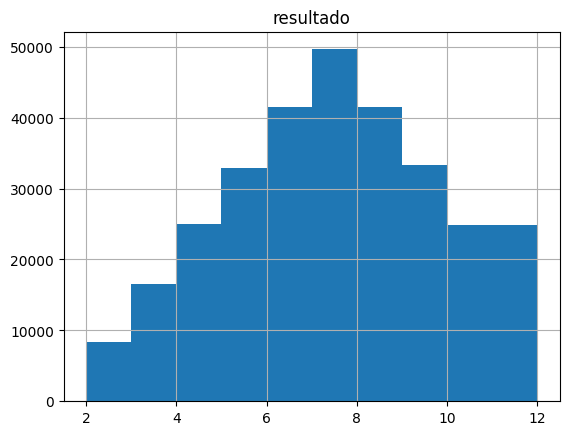

In [ ]:
pd.DataFrame({'resultado' : resultados}).hist()


## Prueba Omnibus para demostrar normalidad en los datos

In [9]:

pddd = pd.read_csv('bank.csv')


<Axes: >

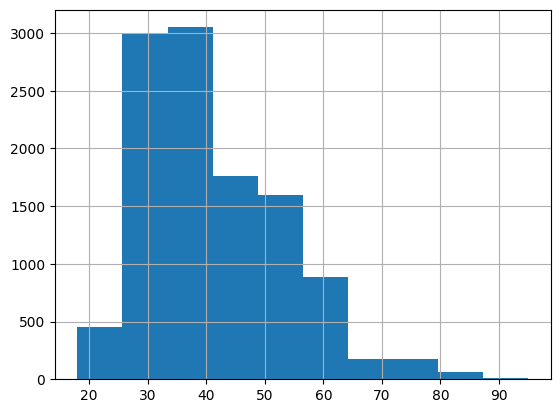

In [13]:
pddd.age.hist()

<Axes: >

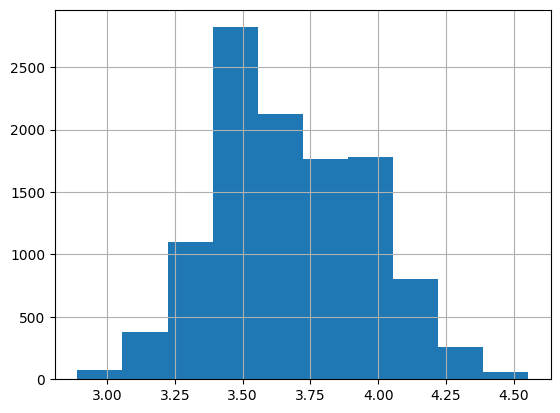

In [12]:
from math import log 
pddd.age.apply(lambda x: log(x)).hist()

In [ ]:

from scipy.stats import normaltest

#Ho: Los datos siguen una distribución normal
#Ha: No hay evidencia para probar que los datos sigan distribución normal


In [ ]:
# alpha = 1 - %Confianza
def check_p_val(p_val, alpha):
    if p_val < alpha:
        print('Tenemos evidencia suficiente para rechazar la hipótesis nula.')
    else:
        print('No tenemos evidencia suficiente para rechazar la hipótesis nula.')

In [ ]:
stat, p_val = normaltest(pddd.age)

In [ ]:
check_p_val(p_val, 0.05)

Tenemos evidencia suficiente para rechazar la hipótesis nula.


In [ ]:
pddd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<Axes: >

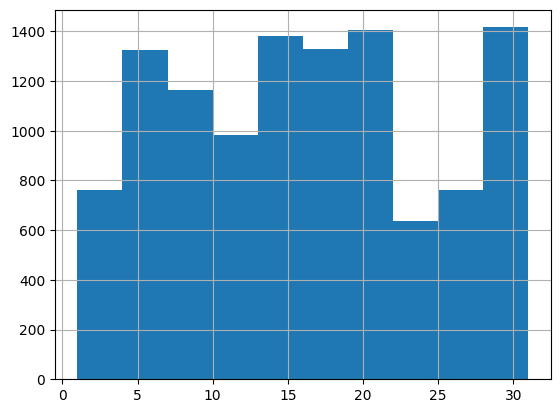

In [ ]:
pddd.day.hist()

In [ ]:
confianza = 0.95
alpha = 1 - confianza

stat, p_val = normaltest(pddd.day)
check_p_val(p_val, alpha)


Tenemos evidencia suficiente para rechazar la hipótesis nula.


In [ ]:
from scipy import stats 
d1 = stats.norm.rvs(size=100000)

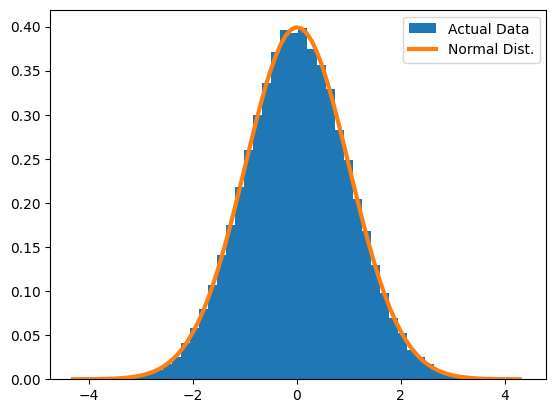

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.hist(d1, 50, density=True, label='Actual Data');
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.legend();

In [ ]:
confianza = 0.95
alpha = 1 - confianza

stat, p_val = normaltest(d1)
check_p_val(p_val, alpha)


No tenemos evidencia suficiente para rechazar la hipótesis nula.


## Estandarización de datos

In [ ]:
pddd['age_estandar'] = (pddd.age - pddd.age.mean())/pddd.age.std()

In [7]:
pddd['age'].hist()

NameError: ignored

<Axes: >

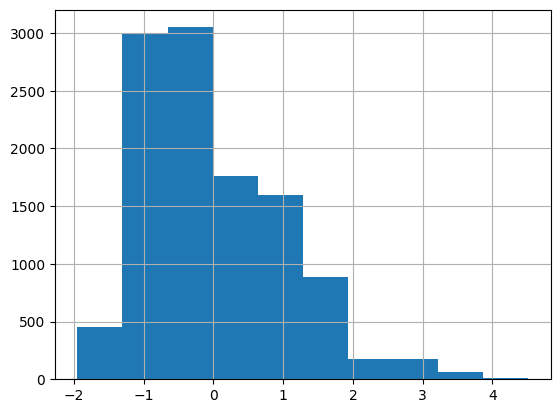

In [ ]:
pddd['age_estandar'].hist()

# Caso fetal health

In [2]:
import pandas as pd

In [3]:
pddf = pd.read_csv('fetal_health.csv')
pddf.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<Axes: >

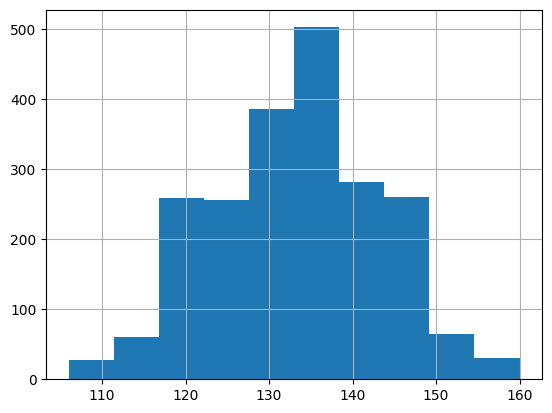

In [ ]:
#¿Será una distribución normal?
pddf['baseline value'].hist()

In [ ]:
confianza = 0.90
alpha = 1 - confianza

stat, p_val = normaltest(pddf['baseline value'])
check_p_val(p_val, alpha)


Tenemos evidencia suficiente para rechazar la hipótesis nula.


Vamos a asumir que los datos siguen una distribución normal pese a los resultados

In [ ]:
pddf['baseline_estandar'] = (pddf['baseline value'] - pddf['baseline value'].mean())/pddf['baseline value'].std()

In [ ]:
pddf['baseline_estandar']

0      -1.351902
1      -0.132494
2      -0.030877
3       0.070740
4      -0.132494
          ...   
2121    0.680444
2122    0.680444
2123    0.680444
2124    0.680444
2125    0.883679
Name: baseline_estandar, Length: 2126, dtype: float64

In [ ]:
pddf['baseline value'].mean()

133.3038570084666

In [ ]:
pddf['baseline value'].std()

9.840844257720995

## Análisis de z-score

Queremos calcular la probabilidad de que un niño tenga ritmo cardiaco mayor a 120

In [4]:
media = pddf['baseline value'].mean()
desv_est = pddf['baseline value'].std()

In [5]:
z = (120 - media)/desv_est
z

-1.351901997435694

El valor de probabilidad inferior para z = -1.35 es igual a 0.088, entonces la probabilidad de que el ritmo cardiaco de un niño sea mayor a 120 es de 1 - 0.088

In [6]:
1-0.088

0.912

## Intervalos de confianza

In [ ]:
# Intervalos de confianza al 95%
# Z-score = +-1.96

#1.96 = (X - 133.3038570084666)/9.840844257720995
LS = 1.96*9.84 + 133.3

#-1.96 = (X - 133.3038570084666)/9.840844257720995
LI = -1.96*9.84 + 133.3



In [ ]:
LS

152.58640000000003

In [ ]:
LI

114.01360000000001

1) ¿Cúal será el intervalo de confianza del 99% para los datos??
2) ¿Cuál es el umbral sobre el cual se encuentra el 95% de los datos?